<a href="https://colab.research.google.com/github/himanshuchrist/AI-ML/blob/ML_Lab/2348520_MLCIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2

In [67]:
#loading the dataset
data=pd.read_csv('/content/drive/MyDrive/2015.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [68]:
#Checking for null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [69]:
#calculating covariance between Economy, family and health
Z=data[['Economy (GDP per Capita)','Family','Health (Life Expectancy)']]
Z.cov()

,Economy (GDP per Capita),Family,Health (Life Expectancy)
Economy (GDP per Capita),0.162506,0.070852,0.081323
Family,0.070852,0.074185,0.035741
Health (Life Expectancy),0.081323,0.035741,0.061047


<Axes: >

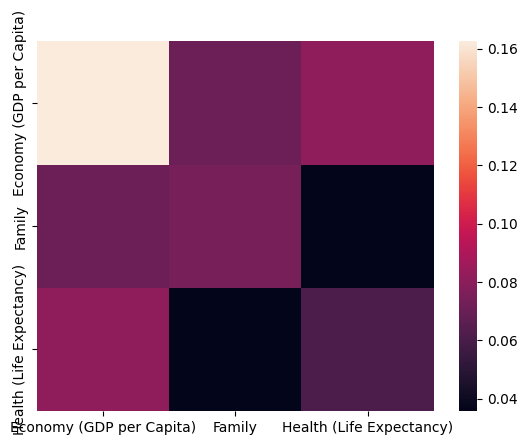

In [70]:
#visualising the covariance matrix using heatmap
sns.heatmap(Z.cov())

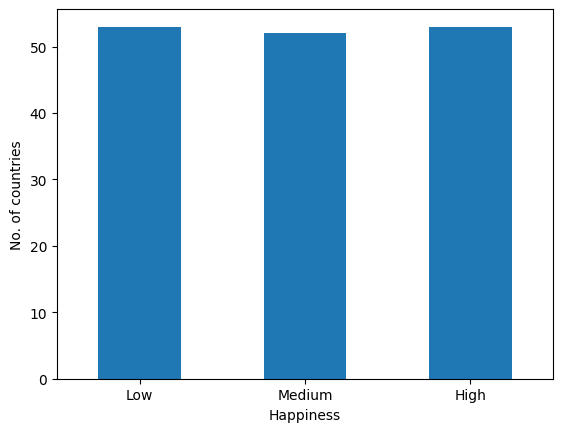

In [79]:
#Creating bins based on happiness score
data['bins']=pd.qcut(data['Happiness Score'],q=3)
data['bins'].value_counts(sort=False).plot(kind='bar',rot=0)
plt.xlabel("Happiness")
plt.ylabel("No. of countries")
plt.xticks([0,1,2],['Low','Medium','High'])
plt.show()

In [72]:
#Converting region's values to numerical
le=LabelEncoder()
data['Region']=le.fit_transform(data['Region'])
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,bins
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(5.87, 7.587]"
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(5.87, 7.587]"
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(5.87, 7.587]"
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(5.87, 7.587]"
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(5.87, 7.587]"


In [73]:
#standardising  Economy
sc=StandardScaler()
data['Economy (GDP per Capita)']=sc.fit_transform(data[['Economy (GDP per Capita)']])
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,bins
0,Switzerland,9,1,7.587,0.03411,1.369621,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(5.87, 7.587]"
1,Iceland,9,2,7.561,0.04884,1.135226,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(5.87, 7.587]"
2,Denmark,9,3,7.527,0.03328,1.192861,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(5.87, 7.587]"
3,Norway,9,4,7.522,0.03880,1.525130,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(5.87, 7.587]"
4,Canada,5,5,7.427,0.03553,1.194876,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(5.87, 7.587]"


<Axes: ylabel='Frequency'>

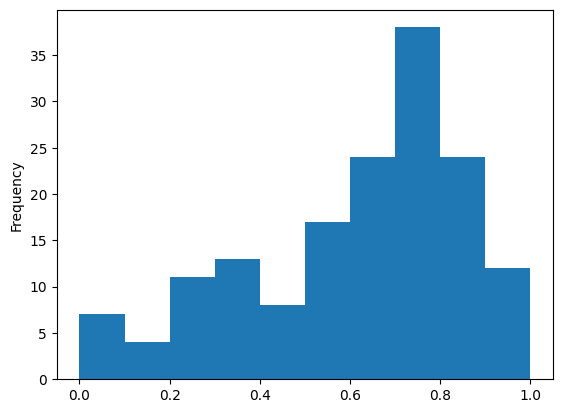

In [74]:
#Normalizing Health
mm=MinMaxScaler()
data['Health (Life Expectancy)']=mm.fit_transform(data[['Health (Life Expectancy)']])
data['Health (Life Expectancy)'].plot(kind='hist')

In [75]:
#Testing association between region and happiness rank
X=data[['Region']]
Y=data['Happiness Rank']
chi_score=chi2(X,Y)
chi_values=pd.Series(chi_score[0])
p_value=pd.Series(chi_score[1])
p_value

0    1.702588e-08
dtype: float64

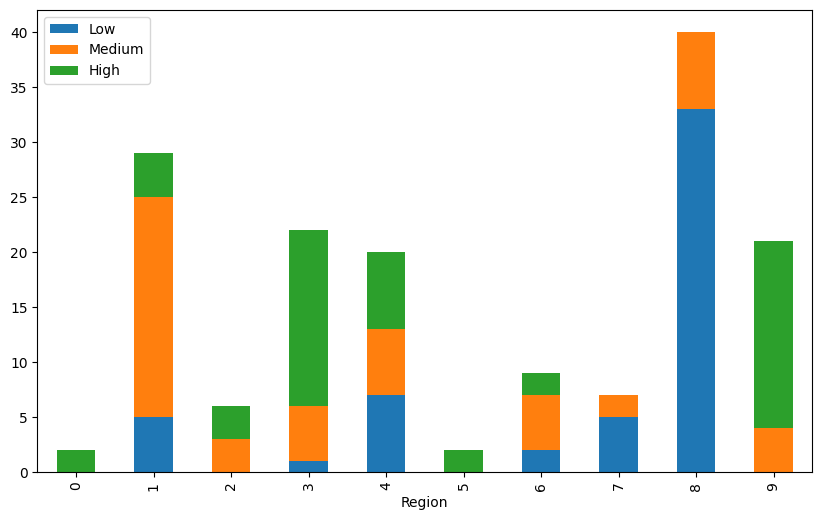

In [83]:
#stacked bar graph showing distribution of region by happiness score
data.groupby(['Region', 'bins']).count()['Happiness Rank'].unstack().plot(kind='bar', stacked=True,figsize=(10,6))
plt.legend(labels=['Low', 'Medium','High'])